In [135]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import pytesseract
from pytesseract import Output

from ultralyticsplus import YOLO, render_result
from PIL import Image

In [137]:
image = 'ABC_EFD3112_2005_page_1.png'

img = Image.open(image)
img

FileNotFoundError: [Errno 2] No such file or directory: 'ABC_EFD3112_2005_page_1.png'

In [ ]:
model = YOLO('keremberke/yolov8m-table-extraction')

# set model parameters
model.overrides['conf'] = 0.25  # NMS confidence threshold
model.overrides['iou'] = 0.45  # NMS IoU threshold
model.overrides['agnostic_nms'] = False  # NMS class-agnostic
model.overrides['max_det'] = 1000 

Ultralytics YOLOv8.0.21  Python-3.10.0 torch-2.2.1+cpu CPU
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
0: 640x480 1 bordered, 2 borderlesss, 1533.4ms
Speed: 3.4ms pre-process, 1533.4ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


Boxes:  tensor([[6.40000e+01, 2.06000e+02, 5.21000e+02, 4.09000e+02, 7.24687e-01, 1.00000e+00],
        [1.97000e+02, 3.90000e+01, 3.90000e+02, 9.20000e+01, 5.75454e-01, 0.00000e+00],
        [6.40000e+01, 4.23000e+02, 5.29000e+02, 7.54000e+02, 3.12957e-01, 1.00000e+00]])


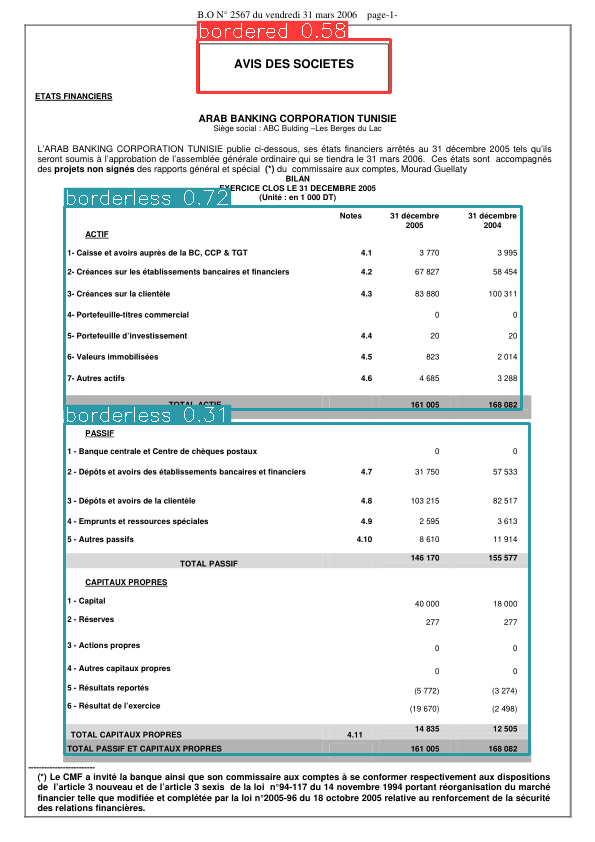

In [ ]:
results = model.predict(img)

# observe results
print('Boxes: ', results[0].boxes)
render = render_result(model=model, image=img, result=results[0])
render

In [ ]:
results[1].boxes.data.numpy()[1]

IndexError: list index out of range

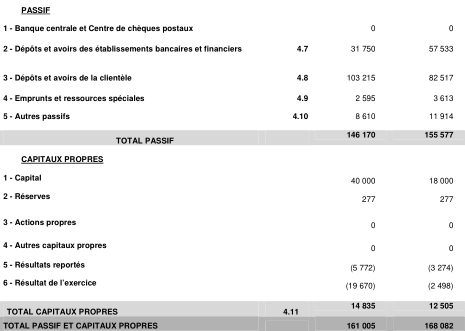

In [ ]:
x1, y1, x2, y2, _, _ = tuple(int(item) for item in results[0].boxes.data.numpy()[2])
img = np.array(Image.open(image))
#cropping
cropped_image = img[y1:y2, x1:x2]
cropped_image = Image.fromarray(cropped_image)
cropped_image

In [ ]:
ext_df = pytesseract.image_to_data(cropped_image, output_type=Output.DATAFRAME, config="--psm 6 --oem 3")
ext_df.head()

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,465,331,-1.000000,NaN
1,2,1,1,0,0,0,3,7,451,318,-1.000000,NaN
2,3,1,1,1,0,0,3,7,451,308,-1.000000,NaN
3,4,1,1,1,1,0,21,7,29,7,-1.000000,NaN
4,5,1,1,1,1,1,21,7,29,7,15.459335,PASSIE


In [ ]:
import cv2
import numpy as np

# Load the original image
original_image = cv2.imread('ABC_EFD3112_2005_page_1.png')

# Get the coordinates of the bounding box
box = results[0].boxes[0].xyxy  # Assuming you want to crop the first detected object
print(box)

# Extract the coordinates of the top-left and bottom-right corners
x1, y1, x2, y2 = map(int, box[0])

# Crop the region of interest (ROI) from the original image
cropped_image = original_image[y1:y2, x1:x2]

# Save or display the cropped image
cv2.imwrite('/content/cropped_table.jpeg', cropped_image)

KeyError: 0